# Chess Piece Classifer Model

In [22]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

In [2]:
%matplotlib inline

In [3]:
label_encoder = LabelEncoder()

### functions

In [4]:
# a function to view an image from a numpy array using matplotlib
def viewImg(arr,index):
    plt.matshow(arr[index], cmap = plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [5]:
# a function to reshape a 4 dimensional(4D) numpy array to a 2 dimensional(2D) one
def reshape(arr):
    num_samples = arr.shape[0]  # Number of samples
    image_height = arr.shape[1]  # Height of the image
    image_width = arr.shape[2]  # Width of the image
    num_channels = arr.shape[3]  # Number of channels (e.g., 3 for RGB)
    return arr.reshape(num_samples, image_height * image_width * num_channels)

In [6]:
# a function to get the data of resized images(numpy arrays) using the name of the directory
def getData(dataset_dir, width, height):
    X = []
    y = []
    
    for folder in os.listdir(dataset_dir):
        folder_path = os.path.join(dataset_dir, folder)
        if not os.path.isdir(folder_path):
            continue

        label = folder

        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if not os.path.isfile(file_path):
                continue

            img = cv2.imread(file_path)
            img = cv2.resize(img, (width, height))

            X.append(img)
            y.append(label)
            
    return np.array(X), y

## Data processing

In [7]:
X, y = getData("data", 85, 85)#collecting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 209)

In [8]:
#processing the training data
X_train_reshaped = reshape(X_train)
y_train_encoded = label_encoder.fit_transform(y_train)

#processing the testing data
X_test_reshaped = reshape(X_test)
y_test_encoded = label_encoder.fit_transform(y_test)

## Viewing the data

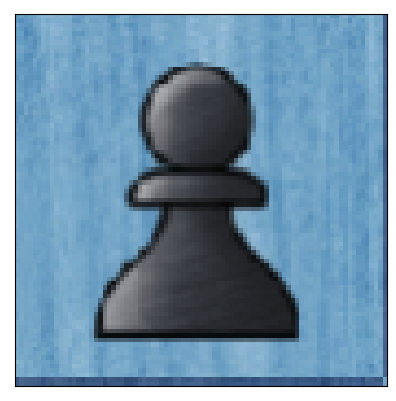

In [17]:
viewImg(X_train, 78)

In [18]:
y_train[78]

'pawn'

## Training the model

In [9]:
model = MLPClassifier(
    solver = "adam", 
    activation = "relu", 
    max_iter = 1000
)

In [10]:
model.fit(X_train_reshaped, y_train_encoded)

/data/user/0/ru.iiec.pydroid3/files/arm-linux-androideabi/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


MLPClassifier(max_iter=1000)

## Evaluating the model

In [20]:
print(f"Accuracy Score : { model.score(X_test_reshaped, y_test_encoded) } ")#Printing the score of the model using the test

Accuracy Score : 0.8253968253968254 


In [34]:
y_pred = model.predict(X_test_reshaped)
print(f"Precision Score : { precision_score(y_test_encoded, y_pred, average = 'weighted') }")
print(f"Recall Score : { recall_score(y_test_encoded, y_pred, average = 'weighted') }")

Precision Score : 0.8398689721270367
Recall Score : 0.8253968253968254


## Testing using an image 

In [12]:
print(model.predict([X_test_reshaped[32]]))#predicting the output

[2]


In [13]:
label_encoder.inverse_transform([2])#decoding the endoded predicted output of the model

array(['knight'], dtype='<U6')

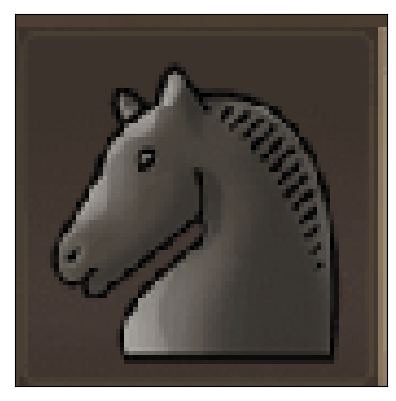

In [14]:
viewImg(X_test, 32)

In [15]:
dump(model, "savedModel.pkl")

['savedModel.pkl']